In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline


In [3]:
IRS_data = pd.read_csv('/Users/chrislele/Downloads/IRSIncomeByZipCode.csv')

In [4]:
IRS_data.head()

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


In [5]:
SAT_info = pd.read_csv('/Users/chrislele/Downloads/scores.csv')

In [6]:
SAT_info.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [7]:
nyc_zipcodes = SAT_info['Zip Code'].unique()

filtered_irs_data = IRS_data[IRS_data['ZIPCODE'].isin(nyc_zipcodes)][['ZIPCODE', 'Avg total income']]
filtered_irs_data.rename(columns={'ZIPCODE': 'Zip Code'}, inplace=True)

merged_data = SAT_info.merge(filtered_irs_data, on='Zip Code', how='left')

In [8]:
merged_data.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [9]:
missing = pd.concat([merged_data.isnull().sum(), 100 * merged_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Average Score (SAT Writing),60,13.793103
Average Score (SAT Reading),60,13.793103
Average Score (SAT Math),60,13.793103
Percent Tested,49,11.264368
Percent Asian,7,1.609195
Percent Hispanic,7,1.609195
Percent Black,7,1.609195
Percent White,7,1.609195
Student Enrollment,7,1.609195
Start Time,4,0.919540


In [10]:
NYC_Housing = pd.read_csv('/Users/chrislele/Downloads/NYC Housing Sales.csv')

In [11]:
NYC_Housing.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [12]:
NYC_Housing.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [13]:
import numpy as np

# Replace '-' with NaN
NYC_Housing['SALE PRICE'] = NYC_Housing['SALE PRICE'].replace('-', np.nan)

# Count non-null values
non_null_values = NYC_Housing['SALE PRICE'].notnull().sum()

# Count null values
null_values = len(NYC_Housing) - non_null_values

print("Number of null values in 'SALE PRICE':", null_values)

Number of null values in 'SALE PRICE': 0


In [14]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_1000 = len(NYC_Housing[NYC_Housing['SALE PRICE'] > 1000])

print("Number of values greater than 1000 in 'SALE PRICE':", count_greater_than_1000)

Number of values greater than 1000 in 'SALE PRICE': 58604


In [15]:
# Convert 'SALE PRICE' column to numeric type
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Count values greater than 1000 in 'SALE PRICE' column
count_greater_than_100 = len(NYC_Housing[NYC_Housing['GROSS SQUARE FEET'] > 100])

print("Number of values greater than 100 in 'GROSS SQUARE FEET':", count_greater_than_100)

Number of values greater than 100 in 'GROSS SQUARE FEET': 45514


In [16]:
# Convert 'SALE PRICE' and 'GROSS SQUARE FEET' columns to numeric type
NYC_Housing['SALE PRICE'] = pd.to_numeric(NYC_Housing['SALE PRICE'], errors='coerce')
NYC_Housing['GROSS SQUARE FEET'] = pd.to_numeric(NYC_Housing['GROSS SQUARE FEET'], errors='coerce')

# Create 'Avg_price_sqft' column by dividing 'SALE PRICE' by 'GROSS SQUARE FEET'
NYC_Housing['Avg_price_sqft'] = NYC_Housing['SALE PRICE'] / NYC_Housing['GROSS SQUARE FEET']

In [17]:
NYC_Housing['Avg_price_sqft'].info

<bound method Series.info of 0        1028.726708
1                NaN
2                NaN
3         579.374742
4        1733.477790
            ...     
84543     174.757282
84544     231.384098
84545     307.486631
84546     182.374986
84547      28.875000
Name: Avg_price_sqft, Length: 84548, dtype: float64>

In [18]:
# Remove NaN values from 'Avg_price_sqft' column
NYC_Housing_cleaned = NYC_Housing.dropna(subset=['Avg_price_sqft'])

# View head of cleaned DataFrame
NYC_Housing_cleaned['Avg_price_sqft'].head(50)

0      1028.726708
3       579.374742
4      1733.477790
6       755.522953
9       876.315932
11      838.056680
22      709.346686
73      767.712218
172     982.142857
173    1286.554922
174    1279.288985
195    1031.790296
206    1926.070039
207       0.001769
208       0.001769
209       0.001769
212    1556.850141
214    2228.187919
216    4253.056885
218    2058.823529
219    1638.888889
220    2629.848784
221    1079.963235
222     250.211690
223      65.843602
224      99.584518
227    3442.622951
230     843.137255
231     868.192581
232     965.575147
233     850.000000
234     231.248743
239      29.689600
277      23.114754
831    2025.228325
832       0.002995
834    1855.183270
928    4240.196078
929    3016.505407
931    1326.705701
932     990.243902
937    1360.759494
938    2255.866206
940    5263.157895
941    2715.189873
943    2481.854367
945     933.333333
947    2305.064322
949     726.088583
950    1143.075690
Name: Avg_price_sqft, dtype: float64

In [19]:
NYC_Housing_filtered = NYC_Housing[NYC_Housing['Avg_price_sqft'] >= 20]
NYC_Housing_filtered.head(100)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Avg_price_sqft
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00,1028.726708
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00,579.374742
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00,1733.477790
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,0,8,1750,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00,755.522953
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,0,24,4489,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00,876.315932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,2054,1,FASHION,21 OFFICE BUILDINGS,4,833,11,,O4,1250 BROADWAY,...,55,55,30750,645977.0,1969,4,O4,565000000.0,2016-11-01 00:00:00,874.644144
2051,2055,1,FASHION,21 OFFICE BUILDINGS,4,838,12,,O6,53 WEST 36TH STREET,...,17,17,5925,64300.0,1911,4,O6,54000000.0,2016-10-27 00:00:00,839.813375
2058,2062,1,FASHION,23 LOFT BUILDINGS,4,762,61,,L1,338 WEST 39TH STREET,...,12,12,4937,55473.0,1926,4,L1,1161500.0,2017-07-21 00:00:00,20.938114
2059,2063,1,FASHION,23 LOFT BUILDINGS,4,785,75,,L3,260 WEST 36TH STREET,...,12,12,7266,81375.0,1907,4,L3,5000000.0,2017-02-09 00:00:00,61.443932


In [20]:
print(merged_data.columns)
print(NYC_Housing.columns)

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')
Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [21]:
# Check the existing column names in NYC_Housing DataFrame
print(NYC_Housing.columns)



Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')


In [22]:
NYC_Housing.head(2).T

,0,1
Unnamed: 0,4,5
BOROUGH,1,1
NEIGHBORHOOD,ALPHABET CITY,ALPHABET CITY
BUILDING CLASS CATEGORY,07 RENTALS - WALKUP APARTMENTS,07 RENTALS - WALKUP APARTMENTS
TAX CLASS AT PRESENT,2A,2
BLOCK,392,399
LOT,6,26
EASE-MENT,,
BUILDING CLASS AT PRESENT,C2,C7
ADDRESS,153 AVENUE B,234 EAST 4TH STREET


In [23]:
# Rename 'ZIP CODE' column to 'Zip Code' in NYC_Housing
NYC_Housing.rename(columns={'ZIP CODE': 'Zip Code'}, inplace=True)




In [24]:
display(NYC_Housing.columns, merged_data.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'Zip Code',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Avg_price_sqft'],
      dtype='object')

Index(['School ID', 'School Name', 'Borough', 'Building Code',
       'Street Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Phone Number', 'Start Time', 'End Time', 'Student Enrollment',
       'Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian',
       'Average Score (SAT Math)', 'Average Score (SAT Reading)',
       'Average Score (SAT Writing)', 'Percent Tested', 'Avg total income'],
      dtype='object')

In [25]:
# Select columns from NYC_Housing
columns_to_merge = ['BUILDING CLASS AT PRESENT', 'TOTAL UNITS', 'Zip Code','GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE', 'Avg_price_sqft']

# Merge DataFrames
#merged_data = merged_data.merge(NYC_Housing[columns_to_merge], on='Zip Code', how='left')

md = merged_data.merge(NYC_Housing[columns_to_merge].groupby('Zip Code').median().reset_index(), on='Zip Code', how='left')

# View head of the merged DataFrame
#merged_data.head()
md.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [26]:
md.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [27]:
Crime_Data = pd.read_csv('/Users/chrislele/Downloads/NYPD_Complaint_Data_Current_YTD.csv')


In [28]:
ST_ratio = pd.read_csv('/Users/chrislele/Downloads/2015_-_2016_Final_Class_Size_Report_Pupil-to-Teacher_Ratio__PTR_.csv')



In [29]:
ST_ratio.T

,0,1,2,3,4,5,6,7,8,9,...,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570
DBN,15K001,12X691,11X567,09X555,12X536,12X531,11X483,11X481,12X463,12X458,...,21K344,21K337,14K322,13K265,20K227,20K223,32K168,17K122,14K071,18K068
School Name,P.S. 001 THE BERGEN,BRONX LITTLE SCHOOL,LINDEN TREE ELEMENTARY SCHOOL,MOUNT EDEN CHILDREN'S ACADEMY,PS 536,ARCHER ELEMENTARY SCHOOL,P.S. 483,P.S. 481,URBAN SCHOLARS COMMUNITY SCHOOL,SAMARA COMMUNITY SCHOOL,...,RACHEL CARSON HIGH SCHOOL FOR COASTAL STUDIES,INTERNATIONAL HIGH SCHOOL AT LAFAYETTE,FOUNDATIONS ACADEMY,DR. SUSAN S. MCKINNEY SECONDARY SCHOOL OF THE ...,J.H.S. 227 EDWARD B. SHALLOW,J.H.S. 223 THE MONTAUK,THE BROOKLYN SCHOOL FOR MATH AND RESEARCH,PATHWAYS IN TECHNOLOGY EARLY COLLEGE HIGH SCHO...,JUAN MOREL CAMPOS SECONDARY SCHOOL,I.S. 068 ISAAC BILDERSEE
School Pupil-Teacher Ratio,13.4,12.0,16.9,18.1,14.8,13.7,14.3,14.1,13.8,19.0,...,16.6,15.2,5.5,13.6,16.6,14.9,13.6,19.8,10.7,10.2


In [30]:
md.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,Clinton School Writers and Artists,Inwood Early College for Health and Informatio...,"New Explorations into Science, Technology and ...",Essex Street Academy,Lower Manhattan Arts Academy,High School for Dual Language and Asian Studies,Henry Street School for International Studies,Bard High School Early College,Urban Assembly Academy of Government and Law,Marta Valle High School,...,High School for Law Enforcement and Public Safety,Eagle Academy for Young Men III,August Martin High School,Frederick Douglass Academy VI High School,Academy of Medical Technology (College Board),"Queens High School for Information, Research, ...",Rockaway Park High School for Environmental Su...,Channel View School for Research,Rockaway Collegiate High School,Scholars' Academy
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [31]:
ST_ratio.columns

Index(['DBN', 'School Name', 'School Pupil-Teacher Ratio'], dtype='object')

In [32]:
md['School Name'] = md['School Name'].apply(lambda x: x.upper())


In [33]:
# Assuming 'ST_ratio' is the DataFrame containing the 'School Pupil-Teacher Ratio' column
md_merged_data = md.merge(ST_ratio[['School Name', 'School Pupil-Teacher Ratio']], on='School Name', how='left')

In [34]:
df_unmatched = pd.DataFrame(md_merged_data[md_merged_data['School Pupil-Teacher Ratio'].isnull()]['School Name'].unique())

In [35]:
df_unmatched = df_unmatched.rename(columns={0: 'School Name'})
df_unmatched['New Name'] = ''
df_unmatched

,School Name,New Name
0,CLINTON SCHOOL WRITERS AND ARTISTS,
1,URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW,
2,HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,
3,URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN,
4,47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...,
...,...,...
85,"QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...",
86,YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS,
87,QUEENS COLLEGIATE (COLLEGE BOARD),
88,HILLSIDE ARTS AND LETTERS ACADEMY,


In [36]:
df_unmatched.to_csv('lookup_names_missing.csv')

In [194]:
md_merged_data.T

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
School ID,02M260,06M211,01M539,02M294,02M308,02M545,01M292,01M696,02M305,01M509,...,28Q690,29Q327,27Q400,27Q260,27Q309,27Q302,27Q324,27Q262,27Q351,27Q323
School Name,CLINTON SCHOOL WRITERS AND ARTISTS,INWOOD EARLY COLLEGE FOR HEALTH AND INFORMATIO...,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",ESSEX STREET ACADEMY,LOWER MANHATTAN ARTS ACADEMY,HIGH SCHOOL FOR DUAL LANGUAGE AND ASIAN STUDIES,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,BARD HIGH SCHOOL EARLY COLLEGE,URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW,MARTA VALLE HIGH SCHOOL,...,HIGH SCHOOL FOR LAW ENFORCEMENT AND PUBLIC SAFETY,EAGLE ACADEMY FOR YOUNG MEN III,AUGUST MARTIN HIGH SCHOOL,FREDERICK DOUGLASS ACADEMY VI HIGH SCHOOL,ACADEMY OF MEDICAL TECHNOLOGY (COLLEGE BOARD),"QUEENS HIGH SCHOOL FOR INFORMATION, RESEARCH, ...",ROCKAWAY PARK HIGH SCHOOL FOR ENVIRONMENTAL SU...,CHANNEL VIEW SCHOOL FOR RESEARCH,ROCKAWAY COLLEGIATE HIGH SCHOOL,SCHOLARS' ACADEMY
Borough,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens,Queens
Building Code,M933,M052,M022,M445,M445,M445,M056,M097,M445,M025,...,Q690,Q633,Q400,Q465,Q465,Q465,Q410,Q410,Q410,Q180
Street Address,425 West 33rd Street,650 Academy Street,111 Columbia Street,350 Grand Street,350 Grand Street,350 Grand Street,220 Henry Street,525 East Houston Street,350 Grand Street,145 Stanton Street,...,116-25 Guy R Brewer Boulevard,171-10 Linden Boulevard,156-10 Baisley Boulevard,8-21 Bay 25th Street,8-21 Bay 25th Street,8-21 Bay 25th Street,100-00 Beach Channel Drive,100-00 Beach Channel Drive,100-00 Beach Channel Drive,320 Beach 104th Street
City,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,...,Jamaica,Jamaica,Jamaica,Far Rockaway,Far Rockaway,Far Rockaway,Rockaway Park,Rockaway Park,Rockaway Park,Rockaway Park
State,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY,...,NY,NY,NY,NY,NY,NY,NY,NY,NY,NY
Zip Code,10001,10002,10002,10002,10002,10002,10002,10002,10002,10002,...,11434,11434,11434,11691,11691,11691,11694,11694,11694,11694
Latitude,40.75321,40.86605,40.71873,40.71687,40.71687,40.71687,40.71376,40.71896,40.71687,40.72057,...,40.68618,40.69167,40.67553,40.60199,40.60199,40.60199,40.58601,40.58601,40.58601,40.58413
Longitude,-73.99786,-73.92486,-73.97943,-73.98953,-73.98953,-73.98953,-73.98526,-73.97607,-73.98953,-73.98567,...,-73.78408,-73.77903,-73.78343,-73.76283,-73.76283,-73.76283,-73.82309,-73.82309,-73.82309,-73.82568


In [179]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("ACADEMY OF MEDICAL TECHNOLOGY")

,DBN,School Name,School Pupil-Teacher Ratio
1276,27Q309,ACADEMY OF MEDICAL TECHNOLOGY: A COLLEGE BOARD...,12.8


In [181]:
Edited_File = pd.read_csv('/Users/chrislele/Downloads/lookup_names_missing.csv')

In [191]:
df_unmatched['School Name'].update(Edited_File['School Name'])
print(df_unmatched['School Name'].head())

0                   CLINTON SCHOOL WRITERS AND ARTISTS
1         URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW
2               HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
3    URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN
4    47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...
Name: School Name, dtype: object


In [187]:
nan_count = df_unmatched['School Name'].isna().sum()
print("Number of NaN values in 'School Name' column: ", nan_count)

Number of NaN values in 'School Name' column:  0


In [190]:
df_unmatched.head(100)

,School Name,New Name
0,CLINTON SCHOOL WRITERS AND ARTISTS,
1,URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW,
2,HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY,
3,URBAN ASSEMBLY SCHOOL OF BUSINESS FOR YOUNG WOMEN,
4,47 AMERICAN SIGN LANGUAGE AND ENGLISH SECONDAR...,
...,...,...
85,"QUEENS HIGH SCHOOL OF TEACHING, LIBERAL ARTS, ...",
86,YOUNG WOMEN'S LEADERSHIP SCHOOL IN QUEENS,
87,QUEENS COLLEGIATE (COLLEGE BOARD),
88,HILLSIDE ARTS AND LETTERS ACADEMY,


In [42]:
def find_school(word):
    return ST_ratio[ST_ratio['School Name'].apply(lambda x: word in x)]

find_school("NYC LAB SCHOOL FOR COLLABORATIVE STUDIES")

,DBN,School Name,School Pupil-Teacher Ratio


In [97]:
from geopy.geocoders import Nominatim

In [133]:
Crime_Data.T

,0,1,2,3,4,5,6,7,8,9,...,361730,361731,361732,361733,361734,361735,361736,361737,361738,361739
CMPLNT_NUM,736216184,294332956,852981427,369976063,117213771,535504374,457718282,169644942,814258815,589253624,...,251695287,479338031,969186688,825396418,593729461,582350583,258046495,640212578,496500431,256379572
CMPLNT_FR_DT,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,...,01/01/2015,01/01/2015,01/01/2015,01/01/2015,01/01/2015,01/01/2015,01/01/2015,01/01/2015,06/30/2014,12/31/2001
CMPLNT_FR_TM,23:25:00,23:16:00,23:00:00,23:00:00,23:00:00,22:55:00,22:51:00,22:48:00,22:45:00,22:45:00,...,07:40:00,06:30:00,04:45:00,04:30:00,04:30:00,03:50:00,01:25:00,00:30:00,12:00:00,16:00:00
CMPLNT_TO_DT,09/30/2016,09/30/2016,09/30/2016,NaN,09/30/2016,09/30/2016,NaN,09/30/2016,NaN,09/30/2016,...,01/01/2016,01/01/2015,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,12/29/2015,01/01/2016
CMPLNT_TO_TM,23:25:00,23:21:00,23:05:00,NaN,23:10:00,23:15:00,NaN,22:50:00,NaN,22:50:00,...,07:50:00,07:00:00,05:00:00,05:00:00,04:50:00,04:00:00,01:30:00,00:40:00,12:00:00,10:50:00
RPT_DT,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,09/30/2016,...,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016,01/01/2016
KY_CD,236,344,235,118,578,118,236,235,117,117,...,106,578,578,344,105,105,578,106,361,107
OFNS_DESC,DANGEROUS WEAPONS,ASSAULT 3 & RELATED OFFENSES,DANGEROUS DRUGS,DANGEROUS WEAPONS,HARRASSMENT 2,DANGEROUS WEAPONS,DANGEROUS WEAPONS,DANGEROUS DRUGS,DANGEROUS DRUGS,DANGEROUS DRUGS,...,FELONY ASSAULT,HARRASSMENT 2,HARRASSMENT 2,ASSAULT 3 & RELATED OFFENSES,ROBBERY,ROBBERY,HARRASSMENT 2,FELONY ASSAULT,OFF. AGNST PUB ORD SENSBLTY &,BURGLARY
PD_CD,782.0,101.0,567.0,793.0,637.0,792.0,782.0,511.0,568.0,501.0,...,109.0,637.0,637.0,101.0,382.0,399.0,638.0,109.0,639.0,213.0
PD_DESC,"WEAPONS, POSSESSION, ETC",ASSAULT 3,"MARIJUANA, POSSESSION 4 & 5",WEAPONS POSSESSION 3,"HARASSMENT,SUBD 1,CIVILIAN",WEAPONS POSSESSION 1 & 2,"WEAPONS, POSSESSION, ETC","CONTROLLED SUBSTANCE, POSSESSI","MARIJUANA, POSSESSION 1, 2 & 3","CONTROLLED SUBSTANCE,POSSESS.",...,"ASSAULT 2,1,UNCLASSIFIED","HARASSMENT,SUBD 1,CIVILIAN","HARASSMENT,SUBD 1,CIVILIAN",ASSAULT 3,"ROBBERY,NECKCHAIN/JEWELRY","ROBBERY,COMMERCIAL UNCLASSIFIED","HARASSMENT,SUBD 3,4,5","ASSAULT 2,1,UNCLASSIFIED",AGGRAVATED HARASSMENT 2,"BURGLARY,COMMERCIAL,NIGHT"


In [148]:
Crime_Data.isnull()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
361736,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
361737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
361738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False


In [150]:
Crime_Data= Crime_Data.dropna(how='any',axis=0)

In [ ]:
import os
import time
from geopy.geocoders import Nominatim
import pandas as pd

# Function to download a portion of the dataset
def download_dataset(start_index, end_index):
    # Code to download the dataset between start_index and end_index
    # ...

    # Simulating the dataset size
    dataset_size = end_index - start_index

    return dataset_size


# Constants
MAX_DOWNLOAD_SIZE = 1000  # Maximum dataset size in megabytes
TIME_INTERVAL_HOURS = 1  # Time interval between downloads in hours

# Create a geolocator object
geolocator = Nominatim(user_agent="my_app")

# Variables
start_index = 0
end_index = 100  # Initial portion to process

# Download the initial portion to measure the size
dataset_size = download_dataset(start_index, end_index)
print("Initial dataset size:", dataset_size, "MB")

# Calculate the number of repetitions needed
repetitions = int(MAX_DOWNLOAD_SIZE / dataset_size)
print("Number of repetitions needed:", repetitions)

# Set the time interval in seconds
time_interval_seconds = TIME_INTERVAL_HOURS * 3600

new_df= pd.DataFrame()
new_col= []


# Process the dataset in a loop
for i in range(repetitions):
    # Subset the data to the current portion
    subset = Crime_Data.iloc[start_index:end_index].copy()

    # Perform reverse geocoding for the subset
    #subset['Address'] = subset.apply(lambda row: geolocator.reverse("{}, {}".format(row['Latitude'], row['Longitude'])),
                                                                    #axis=1)
 
    subset = subset.reset_index(drop=True)
    for index, row in subset.iterrows():
         lat = row['Latitude']
         lang = row['Longitude']
         #subset.iloc[index,'Address'] = geolocator.reverse(f'{lat}, {lang}')
         new_val = geolocator.reverse(f'{lat}, {lang}')
         new_col.append(new_val)
                                            

    # Update the subset in the main dataset
    # Crime_Data.iloc[start_index:end_index] = subset
    
    new_df=pd.concat([new_df,subset],ignore_index=True)
                                     

    print("Processed dataset", i + 1)

    # Update the indices for the next iteration
    start_index = end_index
    end_index += 100  # Increase the portion size for the next iteration

    # Wait for the specified time interval
    time.sleep(time_interval_seconds)

# Save the updated Crime_Data to a file or any other destination
# Crime_Data.to_csv("updated_crime_data.csv", index=False)
new_df.to_csv("subset.csv")                             
                

Initial dataset size: 100 MB
Number of repetitions needed: 10
Processed dataset 1


In [ ]:
subset["Address"] = new_col

subset.to_csv("New_csv_file.csv")




In [67]:
student_enroll = 'Student Enrollment'
column_info = merged_data[student_enroll].info()
print(column_info)


<class 'pandas.core.series.Series'>
RangeIndex: 435 entries, 0 to 434
Series name: Student Enrollment
Non-Null Count  Dtype  
--------------  -----  
428 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB
None


In [63]:
more_merged_data.select_dtypes(object)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Phone Number,Start Time,End Time,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,718-935-3660,8:30 AM,3:00 PM,3.4%,21.8%,67.8%,4.6%,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,212-677-5190,8:15 AM,4:00 PM,28.6%,13.3%,18.0%,38.5%,91.0%
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,212-475-4773,8:00 AM,2:45 PM,11.7%,38.5%,41.3%,5.9%,78.9%
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,212-505-0143,8:30 AM,3:00 PM,3.1%,28.2%,56.9%,8.6%,65.1%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,27Q302,"Queens High School for Information, Research, ...",Queens,Q465,8-21 Bay 25th Street,Far Rockaway,NY,718-868-2978,7:45 AM,4:10 PM,2.1%,49.1%,43.6%,4.2%,44.6%
431,27Q324,Rockaway Park High School for Environmental Su...,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,718-734-3280,8:45 AM,3:30 PM,14.7%,46.7%,30.2%,3.5%,38.5%
432,27Q262,Channel View School for Research,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,718-634-1970,8:15 AM,3:04 PM,10.7%,53.2%,29.1%,6.0%,76.6%
433,27Q351,Rockaway Collegiate High School,Queens,Q410,100-00 Beach Channel Drive,Rockaway Park,NY,718-734-3290,8:30 AM,4:20 PM,3.8%,52.6%,33.5%,5.0%,46.5%


In [64]:
more_merged_data[['School Name', 'Borough']].nunique

<bound method DataFrame.nunique of                                            School Name    Borough
0                   Clinton School Writers and Artists  Manhattan
1    Inwood Early College for Health and Informatio...  Manhattan
2    New Explorations into Science, Technology and ...  Manhattan
3                                 Essex Street Academy  Manhattan
4                         Lower Manhattan Arts Academy  Manhattan
..                                                 ...        ...
430  Queens High School for Information, Research, ...     Queens
431  Rockaway Park High School for Environmental Su...     Queens
432                   Channel View School for Research     Queens
433                    Rockaway Collegiate High School     Queens
434                                  Scholars' Academy     Queens

[435 rows x 2 columns]>

In [65]:
SAT_df = more_merged_data

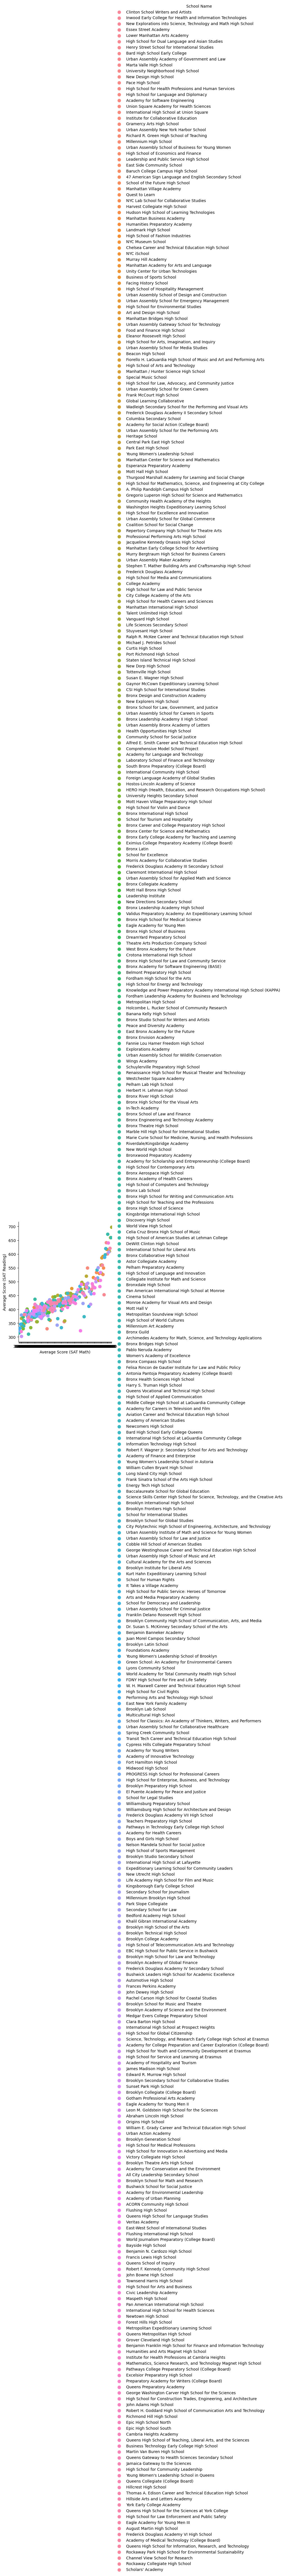

In [66]:
sns.catplot(x="Average Score (SAT Math)", y="Average Score (SAT Reading)", 
data=SAT_df, kind="point", 
hue="School Name")


# Show plot
plt.show()

<AxesSubplot:ylabel='Frequency'>

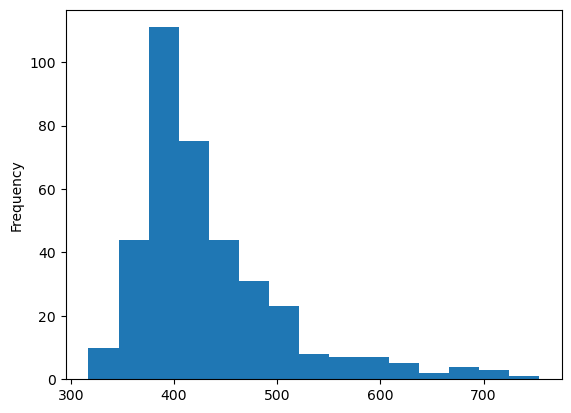

In [67]:
SAT_df['Average Score (SAT Math)'].plot.hist(bins=15)

In [68]:
SAT_df['Average Score (SAT Math)']

0        NaN
1        NaN
2      657.0
3      395.0
4      418.0
       ...  
430    372.0
431    357.0
432    427.0
433    399.0
434    588.0
Name: Average Score (SAT Math), Length: 435, dtype: float64